# Binary Classification of Machine Failures

Bu projemizde makine arızalarını tahmin eden bir model geliştirecegiz.

<img src="https://www.valvolineglobal.com/4ad8d7/globalassets/vcom/article%20tile%20blocks/european%20images%20collection/hard%20working%20conditions.png">

<a href="https://www.kaggle.com/competitions/playground-series-s3e17/data">Dataya Buradan Erişebilirsiniz</a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns",100)

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("train.csv")

In [3]:
df.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [4]:
df.shape

(136429, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

In [6]:
df["Type"].value_counts()

Type
L    95354
M    32152
H     8923
Name: count, dtype: int64

In [7]:
d={"L":3,"M":2,"H":1}

In [8]:
df["Type"]=df["Type"].map(d)

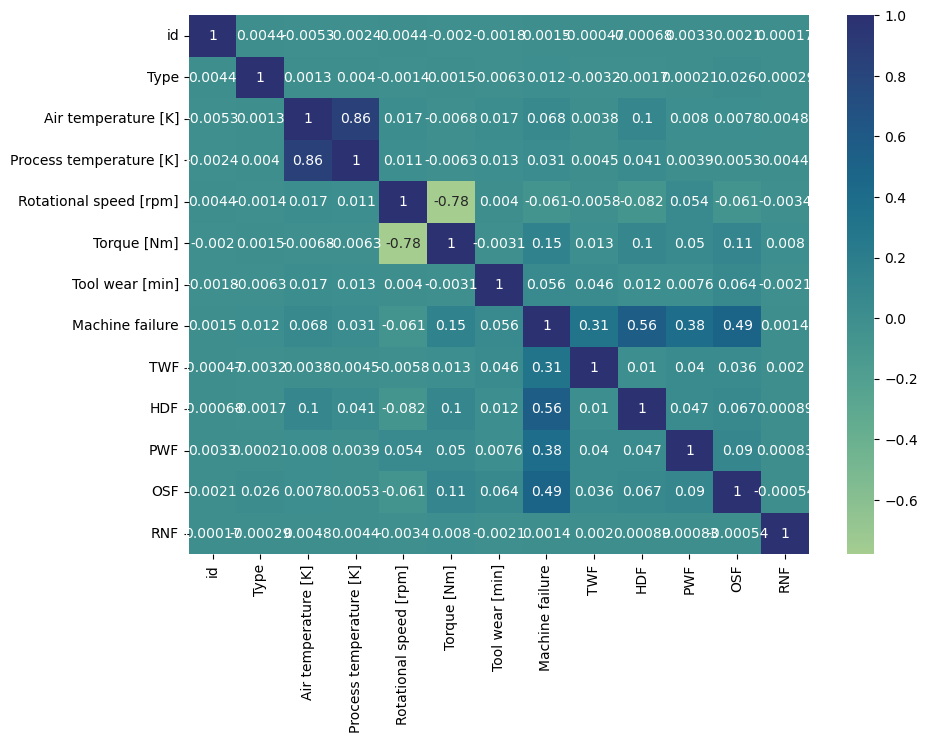

In [9]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(numeric_only=True),annot=True, cmap="crest");

In [10]:
df.describe()

,id,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000
mean,68214.000000,2.633524,299.862776,309.941070,1520.331110,40.348643,104.408901,0.015744,0.001554,0.005160,0.002397,0.003958,0.002258
std,39383.804275,0.602480,1.862247,1.385173,138.736632,8.502229,63.965040,0.124486,0.039389,0.071649,0.048899,0.062789,0.047461
min,0.000000,1.000000,295.300000,305.800000,1181.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34107.000000,2.000000,298.300000,308.700000,1432.000000,34.600000,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,68214.000000,3.000000,300.000000,310.000000,1493.000000,40.400000,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,102321.000000,3.000000,301.200000,310.900000,1580.000000,46.100000,159.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,136428.000000,3.000000,304.400000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: xlabel='Machine failure', ylabel='count'>

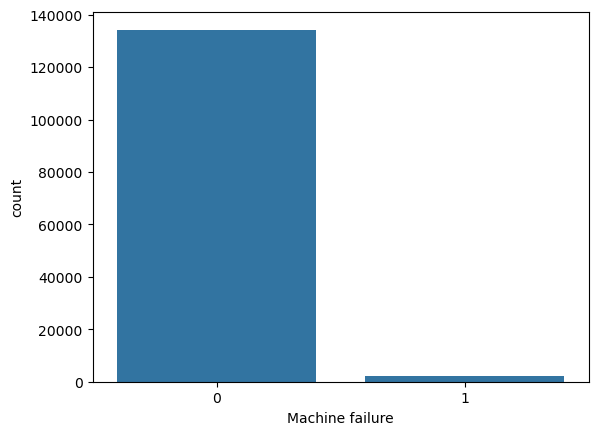

In [11]:
sns.countplot(x=df["Machine failure"])

In [12]:
df[df["Machine failure"]==0].shape

(134281, 14)

In [13]:
df[df["Machine failure"]==1].shape

(2148, 14)

In [14]:
ek=pd.DataFrame()

Verimiz Imbalance oldugu icin biraz daha dengeli hale getirdik

In [15]:
ek=df[df["Machine failure"]==1].sample(130000,replace=True)

In [16]:
df=pd.concat([df, ek], ignore_index=True)

In [17]:
df

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,3,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,2,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,3,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,3,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,2,298.0,309.0,1641,35.4,34,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266424,68614,L51826,3,303.3,311.5,1353,56.0,190,1,0,1,0,1,0
266425,55917,M16590,2,298.3,307.7,1310,58.1,119,1,0,0,0,0,0
266426,118409,L55686,3,298.4,309.6,1710,34.6,163,1,0,0,0,0,0
266427,93739,L48689,3,298.0,308.5,1376,60.0,212,1,0,0,0,1,0


In [18]:
df.columns=["id","Product ID","Type","Air temperature","Process temperature","Rotational speed","Torque","Tool wear",
             "Machine failure","TWF","HDF","PWF","OSF","RNF"]

In [19]:
df=df.drop(["id","Product ID"],axis=1)

### Modelling

In [24]:
x=df.drop("Machine failure",axis=1)
y=df["Machine failure"]

In [22]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def algo_test_classification(X, y):
    # Bütün sınıflandırma modellerini tanımlıyorum
    lr = LogisticRegression()
    svc = SVC()
    knn = KNeighborsClassifier()
    dt = DecisionTreeClassifier()
    rf = RandomForestClassifier()
    gb = GradientBoostingClassifier()
    xgb = XGBClassifier()
    mlp = MLPClassifier()

    algos = [lr, svc, knn, dt, rf, gb, xgb, mlp]
    algo_names = ['Logistic Regression', 'SVC', 'KNN', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'XGBoost', 'MLP']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    accuracy = []
    precision = []
    recall = []
    f1 = []

    # Sonuç tablosunu oluşturuyorum
    result = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1'], index=algo_names)

    for algo in algos:
        algo.fit(X_train, y_train)
        y_pred = algo.predict(X_test)
        accuracy.append(accuracy_score(y_test, y_pred))
        precision.append(precision_score(y_test, y_pred))
        recall.append(recall_score(y_test, y_pred))
        f1.append(f1_score(y_test, y_pred))

    # Sonuçları result tablosuna ekliyorum
    result['Accuracy'] = accuracy
    result['Precision'] = precision
    result['Recall'] = recall
    result['F1'] = f1

    # Sonuçları doğruluk oranına göre sıralayıp döndürüyorum
    return result.sort_values('Accuracy', ascending=False)

In [22]:
algo_test_classification(x,y)

,Accuracy,Precision,Recall,F1
Random Forest,0.999437,0.998875,1.000000,0.999437
Decision Tree,0.997936,0.995888,1.000000,0.997940
XGBoost,0.990861,0.989665,0.992080,0.990871
KNN,0.984686,0.970280,1.000000,0.984916
Gradient Boosting,0.918346,0.954970,0.878078,0.914912
MLP,0.908118,0.948996,0.862575,0.903724
Logistic Regression,0.896070,0.981122,0.807658,0.885979
SVC,0.826033,0.825403,0.826952,0.826177


In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [26]:
rf = RandomForestClassifier()

In [27]:
mod=rf.fit(x_train,y_train)

In [28]:
thmn=mod.predict(x_test)

In [29]:
accuracy_score(y_test,thmn)

0.9994370003377998

In [31]:
import pickle

In [32]:
with open('machine.pkl', 'wb') as file:
    pickle.dump(rf, file)

<Axes: >

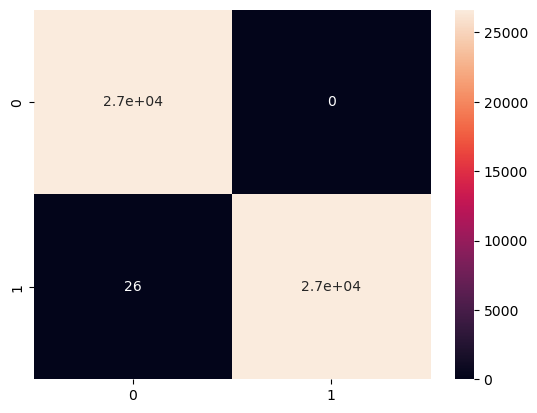

In [33]:
sns.heatmap(confusion_matrix(thmn,y_test),annot=True)

In [34]:
print(classification_report(thmn,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26620
           1       1.00      1.00      1.00     26666

    accuracy                           1.00     53286
   macro avg       1.00      1.00      1.00     53286
weighted avg       1.00      1.00      1.00     53286



Kaggle daki test dosyamızı yükleyip tahmin ettireceğiz.

In [45]:
test=pd.read_csv("test.csv")

In [46]:
dosya=pd.DataFrame()

In [47]:
dosya["id"]=test["id"]

In [48]:
test["Type"]=test["Type"].map(d)

In [49]:
test.columns=["id","Product ID","Type","Air temperature","Process temperature","Rotational speed","Torque","Tool wear",
             "TWF","HDF","PWF","OSF","RNF"]

In [50]:
test=test.drop(["id","Product ID"],axis=1)

In [51]:
dosya["Machine failure"]=mod.predict(test)

In [52]:
dosya

,id,Machine failure
0,136429,0
1,136430,0
2,136431,0
3,136432,0
4,136433,0
...,...,...
90949,227378,0
90950,227379,0
90951,227380,0
90952,227381,0


In [53]:
dosya["Machine failure"].value_counts()

Machine failure
0    89764
1     1190
Name: count, dtype: int64

In [55]:
dosya.to_csv("tahmin1.csv",index=False)

### Deep Learning

In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import normalize, scale

In [57]:
model=Sequential()
model.add(Dense(120,activation="relu"))  # Modele layer ekliyor # Dense bütün nöronlar bütün nöronlara bağlansın demek
model.add(Dense(80,activation="relu")) # 120 nöron var 
model.add(Dense(64,activation="relu"))
model.add(Dense(30,activation="relu"))
model.add(Dense(20,activation="relu"))
model.add(Dense(4,activation="relu"))
model.add(Dense(1,activation="sigmoid")) # Binary classification olduğu için sigmoid kullandık ! Regression da yok
model.compile(loss="binary_crossentropy", optimizer="adam",metrics=["accuracy"]) # Loss: hata MSE gibi # Optimizer=adam 

In [58]:
x=scale(x) # hepsini aynı birime getirdik

In [59]:
history=model.fit(x,y,epochs=75,batch_size=23, validation_split=.20, verbose=1)

Epoch 1/75
9268/9268 ━━━━━━━━━━━━━━━━━━━━ 9s 768us/step - accuracy: 0.9252 - loss: 0.2053 - val_accuracy: 0.8586 - val_loss: 0.3105
Epoch 2/75
9268/9268 ━━━━━━━━━━━━━━━━━━━━ 7s 774us/step - accuracy: 0.9377 - loss: 0.1541 - val_accuracy: 0.9124 - val_loss: 0.1775
Epoch 3/75
9268/9268 ━━━━━━━━━━━━━━━━━━━━ 7s 759us/step - accuracy: 0.9491 - loss: 0.1180 - val_accuracy: 0.9511 - val_loss: 0.1124
Epoch 4/75
9268/9268 ━━━━━━━━━━━━━━━━━━━━ 7s 759us/step - accuracy: 0.9618 - loss: 0.0884 - val_accuracy: 0.9776 - val_loss: 0.0730
Epoch 5/75
9268/9268 ━━━━━━━━━━━━━━━━━━━━ 7s 747us/step - accuracy: 0.9689 - loss: 0.0748 - val_accuracy: 0.9807 - val_loss: 0.0601
Epoch 6/75
9268/9268 ━━━━━━━━━━━━━━━━━━━━ 7s 795us/step - accuracy: 0.9734 - loss: 0.0663 - val_accuracy: 0.9699 - val_loss: 0.0937
Epoch 7/75
9268/9268 ━━━━━━━━━━━━━━━━━━━━ 7s 777us/step - accuracy: 0.9770 - loss: 0.0587 - val_accuracy: 0.9675 - val_loss: 0.1059
Epoch 8/75
9268/9268 ━━━━━━━━━━━━━━━━━━━━ 8s 816us/step - accuracy: 0.9800 -

In [60]:
dosya["Machine failure"]=model.predict(test)

2843/2843 ━━━━━━━━━━━━━━━━━━━━ 1s 477us/step


In [61]:
dosya.to_csv("tahmin2.csv",index=False)

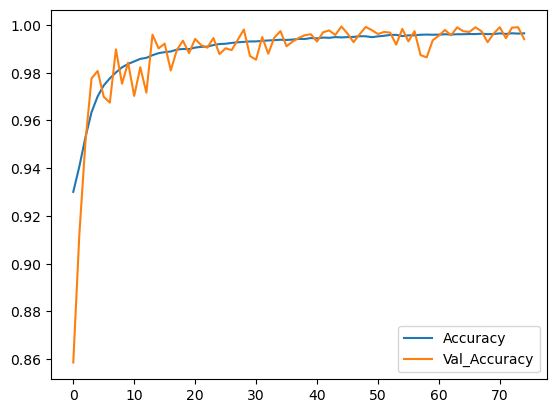

In [62]:
plt.plot(history.history["accuracy"],label="Accuracy")    
plt.plot(history.history["val_accuracy"],label="Val_Accuracy")
plt.legend()

Sonuc olarak hem ML hem de DL olarak modelimizi egittik.